# KL Diveregence, ELBO and free energy

# Evidence Lower Bound (ELBO $\mathcal{L}$) or Variational Free Energy
As seen in the previous section we need to minimize the KL Divergence.


$$
\begin{align}
D_{KL}\left[q(x)\;||\;p(x|D)\right]
&= \sum_x{q(x)\ln\left(\frac{q(x)}{p(x|D)}\right)}\\
\end{align}
$$

However the problem is we don't have the marginal or the normalized version of $p$ in the first place. We only know $p(x | D)$ (numerator in a bayes theorem case). Thus we cannot use this equation directly.

However we can do some algebra.
Note: $p(x,D) = p(x\cap D)$

$$
\begin{align}
D_{KL}\left[q(x)\;||\;p(x|D)\right]
&= \sum_x{q(x)\ln\left(\frac{q(x)}{\frac{p(x, D)}{p(D)}}\right)}\\\\
&= \sum_x{q(x)\ln\left(\frac{q(x){p(D)}}{{p(x, D)}}\right)}\\\\
&= \sum_x{q(x)\ln\left(\frac{q(x)}{{p(x, D)}}\right)} +\sum_x{q(x)ln\left(p(D)\right)} \\\\
&= \mathbb{E}_q\left[\ln\left(\frac{q(x)}{{p(x, D)}}\right)\right] +\mathbb{E}_q\left[ln\left(p(D)\right)\right] \\\\
\end{align}
$$

Since $p(D)$ is independent of $q$ (It is the probability of the data) therefore it is a constant that does not depend on $q$ thus the expectation of that with respective to q is simply the value itself

$$
\begin{align}
D_{kl}\left[q(x)\;||\;p(x|d)\right]
&= \mathbb{E}_q\left[\ln\left(\frac{q(x)}{{p(x, D)}}\right)\right] +ln\left[p(Y=D)\right]\\\\
&=-\mathbb{E}_q\left[\ln\left(\frac{{p(x, D)}}{q(x)}\right)\right] +ln\left[p(Y=D)\right]\\\\
\end{align}
$$
$$
\begin{align}
\text{KL Divergence} = -\mathcal{L}+\text{Evidence}
\end{align}
$$

Where,
$$
\begin{align}
\mathcal{L} &= \mathbb{E}_q\left[\ln\left(\frac{{p(x, D)}}{q(x)}\right)\right]\\\\
\text{Evidence} &=ln\left[p(X=D)\right]
\end{align}
$$
From Gibb's Inequality we see that,
$$
\begin{align}
D_{KL}\left[q(x)\;||\;p(x|d)\right] &\geq 0\\
\implies -\mathcal{L} + \text{Evdience} &\geq0\\
\implies \mathcal{L}\leq  \text{Evidence}
\end{align}
$$
Thus we see that the quantity $\mathcal{L}$ is a lower bound for the evidence aka. **ELBO!!**

Now let us look at this from the statistical mechanics perspective.

We see that since,

$$
\begin{align}
p(x | D) &= \frac{p(x\cap D)}{p(D)}\\\\
&= \frac{e^{-E(x)}}{Z}
\end{align}
$$
Thus we see that, $Z = p(D)$ and that energy of state $x$, $E(x) = -ln(p(x\cap D))$ 

$$
\begin{align}
\mathcal{L} &= \mathbb{E}_q\left[\ln\left(\frac{{p(x, D)}}{q(x)}\right)\right]\\\\
&=\mathbb{E}_q[ln(p(x,D))] -\mathbb{E}_q[ln(q(x))] \\\\
&=-\mathbb{E}_q[E(x)] +H(q(x))
\end{align}
$$
where $H$ is the entropy and the first term is the expected energy with respect to the surrogate 
Now if we compare this with the, 
[[Canonical Ensemble#Helmholtz Free Energy Function (F)]]

We see that the above expression is very similar to the Free energy term if we take the temperature to be 1. (What happens if we actually have a temperature that is not 1?)
If we define 
$$
\tilde{F} = -\mathcal{L}
$$

Where $\tilde{F}$ is the free energy.  the $F = -\ln(Z)$ is sometimes known as the true energy thus the KL Divergence is the difference of the two. and therefore 
Therefore, we can rewrite the expression for the KL Divergence as,


$$
\begin{align}
\text{KL Divergence} &=  \tilde{F} - F
\end{align}
$$
Thus free energy is greater than the true energy provides an upper bound for the true energy.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import interact,widgets
from IPython.display import display


In [2]:
def kl_divergence(q,p):
    p = p/np.sum(p)
    return np.sum(q*np.log(q/p))

def true_energy(p):
    return -np.log(np.sum(p))
def free_energy(q,p):
    return np.sum(q*np.log(q/p))

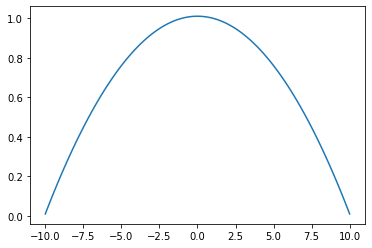

In [3]:
x = np.linspace(-10,10,100)
p = -0.01*(x-1)*(x+1)+1
p = p
plt.plot(x,p)
plt.show()

In [5]:
out = widgets.Output()
@interact(mu=(-10,10),sigma=(0.1,10))
def find_surrogate(mu,sigma):
    with out:
        
        x = np.linspace(-10,10,100)
        q = norm.pdf(x,loc=mu,scale=sigma)
        q = q/np.sum(q)
        plt.plot(x,q)
        plt.plot(x,p/np.sum(p))
        out.clear_output(wait=True)
        plt.show()
        print(f"KL Diveregence is = {kl_divergence(q,p)}")
        print(f"True Energy is = {true_energy(p)}")
        print(f"Free Energy is = {free_energy(q,p)}")
        print(f'Free Energy - True Energy = {free_energy(q,p) - true_energy(p)}')
        
       
        
a = display(out)
        

interactive(children=(IntSlider(value=0, description='mu', max=10, min=-10), FloatSlider(value=5.05, descripti…

Output()